In [18]:
# Importing basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# importing data sample csv into dataframe and dropping useless column
input_df = pd.read_csv('data/data_sample.csv')
input_df = input_df.drop(['Unnamed: 0'],axis=1)

In [20]:
# tranform string variables to time and calculate new variable, view_duration(s)

input_df['view_start_time'] = pd.to_datetime(input_df['view_start_time'])
input_df['view_end_time'] = pd.to_datetime(input_df['view_end_time'])
input_df['view_duration(s)'] = input_df['view_end_time'] - input_df['view_start_time']

input_df['view_duration(s)'] = input_df['view_duration(s)'].dt.total_seconds().astype(int)

In [21]:
# function to add more detail on the time stamp, year, month and day as separate columns
def convert_string_to_date_time(date_str):
    date_ = datetime.strptime(date_str, '%Y-%m-%d').date()

    return date_

def get_year(x):
    return x.year

def get_month(x):
    return x.month

def get_day(x):
    return x.day


In [22]:
input_df['log_date_dt']=  input_df['log_date'].apply(convert_string_to_date_time)
input_df['log_date_year'] = input_df['log_date_dt'].apply(get_year)
input_df['log_date_month'] = input_df['log_date_dt'].apply(get_month)
input_df['log_date_day'] = input_df['log_date_dt'].apply(get_day)

In [23]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [24]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23242 entries, 0 to 23241
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   episode_type      23242 non-null  object        
 1   episode_id        23242 non-null  object        
 2   show_id           23242 non-null  object        
 3   user_id           23235 non-null  object        
 4   log_date          23242 non-null  object        
 5   view_start_time   23242 non-null  datetime64[ns]
 6   view_end_time     23242 non-null  datetime64[ns]
 7   view_percent      23242 non-null  float64       
 8   log_day_sequence  23242 non-null  int64         
 9   view_duration(s)  23242 non-null  int64         
 10  log_date_dt       23242 non-null  object        
 11  log_date_year     23242 non-null  int64         
 12  log_date_month    23242 non-null  int64         
 13  log_date_day      23242 non-null  int64         
dtypes: datetime64[ns](2), 

## Well there are 7 NaN `user_id` entries, what to do?

1. replace the missing `user_id` with dummy one. No merit
2. Just drop the entries with no `user_id`, after all, it is not possible to now which user those records correspond to

In [25]:
# the null and nan are seem as the same
null_user = input_df.isnull().any()
null_count = input_df.isnull().sum()
null_rows = input_df[input_df.isnull().any(axis=1)]

nan_user = input_df.isna().any()
nan_count = input_df.isna().sum()
nan_rows = input_df[input_df.isna().any(axis=1)]

In [26]:
input_df_cleaned = input_df.dropna()
input_df_cleaned.describe()

,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_year,log_date_month,log_date_day
count,23235,23235,23235.000000,23235.000000,23235.000000,23235.0,23235.000000,23235.000000
mean,2024-02-28 01:10:59.407531264,2024-02-28 01:12:41.614331904,38.596778,6.802841,102.206800,2024.0,2.434732,14.843770
min,2024-02-01 02:07:48,2024-02-01 02:09:09,0.000000,1.000000,0.000000,2024.0,2.000000,1.000000
25%,2024-02-18 19:00:16.500000,2024-02-18 19:01:19.500000,7.692000,1.000000,34.000000,2024.0,2.000000,7.000000
50%,2024-02-27 23:45:28,2024-02-27 23:46:23,32.143000,4.000000,83.000000,2024.0,2.000000,15.000000
75%,2024-03-07 15:15:24.500000,2024-03-07 15:16:26,63.158000,10.000000,139.000000,2024.0,3.000000,22.000000
max,2024-04-01 11:00:36,2024-04-01 11:01:03,495.238000,32.000000,15562.000000,2024.0,4.000000,30.000000
std,NaN,NaN,34.071763,6.853733,175.590864,0.0,0.496080,8.471257


In [29]:
# description of the object (categorical) data types
input_df_cleaned.describe(include=['O'])

,episode_type,episode_id,show_id,user_id,log_date,log_date_dt
count,23235,23235,23235,23235,23235,23235
unique,3,7275,384,999,60,60
top,b,ep00000005,s00000004,uu00000043,2024-03-03,2024-03-03
freq,13684,408,2253,1226,854,854


In [60]:
# removing duplicate user entry
# this is to confirm the problem preliminary conditions: 60% of users logging only once
first_user = input_df[['user_id','log_date']].drop_duplicates()
# then i didnt understand this
first_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2937 entries, 0 to 23233
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   2936 non-null   object
 1   log_date  2937 non-null   object
dtypes: object(2)
memory usage: 68.8+ KB


In [43]:
first_user.head()

,user_id,log_date
0,uu00000002,2024-02-01
1,uu00000016,2024-02-02
2,uu00000049,2024-02-03
3,uu00000050,2024-02-03
5,uu00000056,2024-02-04


In [44]:
# created column filled with ones to tag users logged in only once
first_user['count']=1

In [45]:
first_user[first_user['user_id'] == 'uu00000005']

,user_id,log_date,count
1110,uu00000005,2024-02-01,1
7200,uu00000005,2024-02-02,1
7208,uu00000005,2024-02-04,1
7210,uu00000005,2024-02-05,1
7211,uu00000005,2024-02-06,1
7214,uu00000005,2024-02-07,1
7222,uu00000005,2024-02-08,1
7223,uu00000005,2024-02-15,1
7225,uu00000005,2024-02-18,1


In [46]:
first_userg = first_user[['user_id','count']].groupby(['user_id']).sum().reset_index()
first_userg.head()

,user_id,count
0,uu00000002,1
1,uu00000003,1
2,uu00000004,1
3,uu00000005,9
4,uu00000006,3


In [47]:
first_userg_ar = first_userg['count'].value_counts()
first_userg_ar.index.name = 'user_loging_per_day'

In [48]:
first_userg_df = first_userg_ar.reset_index()

In [49]:
#first_userg = first_userg['count'].value_counts().reset_index().rename(columns={'index':'user_loging_per_day'})

In [50]:
first_userg_df.columns

Index(['user_loging_per_day', 'count'], dtype='object')

In [51]:
first_userg_df[first_userg_df['user_loging_per_day']==1]['count']/first_userg_df['count'].sum()

0    0.612613
Name: count, dtype: float64

In [58]:
user_log = input_df[['user_id', 'log_date', 'log_day_sequence']].drop_duplicates()
once_user = user_log[user_log['log_day_sequence'] == 1]
user_log.describe()

,log_day_sequence
count,2937.000000
mean,5.636023
std,6.148755
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,32.000000


In [59]:
1000/2937

0.34048348655090227

In [22]:
first_userg

,user_loging_per_day,count
0,1,612
1,2,158
2,3,58
3,4,34
4,5,18
5,6,14
6,8,13
7,10,11
8,7,10
9,12,7


In [33]:
first_userg_df['count'].sum()

999

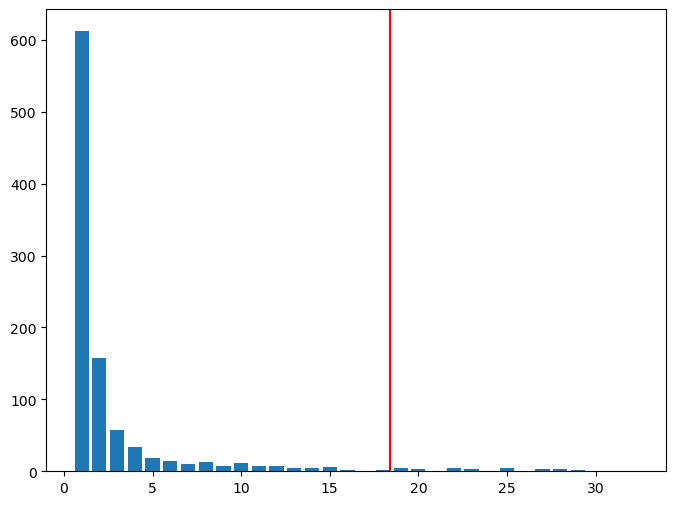

In [34]:
plt.subplots(figsize=(8, 6)) 
plt.bar(first_userg_df['user_loging_per_day'], first_userg_df['count'])
threshold = np.percentile(first_userg_df['user_loging_per_day'], 60)

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')

plt.show()
# # Add labels and title
# plt.xlabel('Values')
# plt.ylabel('Categories')
# plt.title('Horizontal Bar Plot')

In [24]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [25]:
input_df[input_df['view_percent']==0]

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.0,1,14,2024-02-01,2024,2,1
6,a,ep00000002,s00000002,uu00000072,2024-02-04,2024-02-04 13:13:39,2024-02-04 13:14:04,0.0,1,25,2024-02-04,2024,2,4
7,a,ep00000002,s00000002,uu00000079,2024-02-05,2024-02-05 20:43:55,2024-02-05 20:44:00,0.0,1,5,2024-02-05,2024,2,5
14,a,ep00000002,s00000002,uu00000143,2024-02-08,2024-02-08 11:03:24,2024-02-08 11:03:31,0.0,1,7,2024-02-08,2024,2,8
18,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 15:20:34,2024-03-07 15:20:39,0.0,2,5,2024-03-07,2024,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23130,c,ep00007177,s00000165,uu00000962,2024-03-24,2024-03-24 13:11:19,2024-03-24 13:11:54,0.0,3,35,2024-03-24,2024,3,24
23131,c,ep00007178,s00000165,uu00000962,2024-03-23,2024-03-23 16:09:24,2024-03-23 16:10:11,0.0,2,47,2024-03-23,2024,3,23
23144,c,ep00007185,s00000165,uu00000962,2024-03-24,2024-03-24 09:56:37,2024-03-24 09:56:52,0.0,3,15,2024-03-24,2024,3,24
23184,c,ep00007209,s00000163,uu00000962,2024-03-24,2024-03-24 22:36:26,2024-03-24 22:36:42,0.0,3,16,2024-03-24,2024,3,24


In [26]:
input_df['episode_type'].nunique(), input_df['episode_id'].nunique(), input_df['show_id'].nunique()

(3, 7275, 384)

In [ ]:
# What is the similarities
# between users currently loggin in more than once?
# input_df for at least one time 

In [27]:
feature_key = input_df[['episode_type','episode_id','show_id']].drop_duplicates().reset_index(drop=True)

In [28]:
feature_key.shape

(7762, 3)

In [29]:
feature_key.head()

,episode_type,episode_id,show_id
0,a,ep00000002,s00000002
1,a,ep00000003,s00000003
2,a,ep00000004,s00000003
3,a,ep00000005,s00000004
4,a,ep00000007,s00000004


In [32]:
user_unique = input_df['user_id'].unique()

In [33]:
new_user_list =[]

for user in tqdm(user_unique):
    
    new_tmp = feature_key.copy()
    new_tmp['user_id'] = user
    
    new_user_list.append(new_tmp)
    
    
new_user_df = pd.concat(new_user_list)

100%|██████████| 1000/1000 [00:02<00:00, 383.09it/s]


In [34]:
new_user_df.head()

,episode_type,episode_id,show_id,user_id
0,a,ep00000002,s00000002,uu00000002
1,a,ep00000003,s00000003,uu00000002
2,a,ep00000004,s00000003,uu00000002
3,a,ep00000005,s00000004,uu00000002
4,a,ep00000007,s00000004,uu00000002


In [35]:
new_user_df.shape

(7762000, 4)

In [36]:
999*7762

7754238

In [37]:
new_user_df = pd.merge(new_user_df,
                       input_df[['episode_type','episode_id','show_id','user_id','view_percent']], # add filter here 
                       on = ['episode_type','episode_id','show_id','user_id'],
                       how ='left'
                      )

In [38]:
new_user_df['view_percent'] = new_user_df['view_percent'].fillna(0)

In [39]:
new_user_df.shape

(7768240, 5)

In [40]:
new_user_df .head()

,episode_type,episode_id,show_id,user_id,view_percent
0,a,ep00000002,s00000002,uu00000002,0.0
1,a,ep00000003,s00000003,uu00000002,0.0
2,a,ep00000004,s00000003,uu00000002,0.0
3,a,ep00000005,s00000004,uu00000002,0.0
4,a,ep00000007,s00000004,uu00000002,0.0


In [68]:
first_time_users = input_df[input_df['log_day_sequence']==1]['user_id'].unique()
first_time_more = input_df[input_df['log_day_sequence']>2]['user_id'].unique()

In [ ]:
# new_user_f = new_user_df [new_user_df ['user_id'].isin(first_time_users)]
# new_user_sec = new_user_df [new_user_df ['user_id'].isin(first_time_sec)]

In [60]:
# new_user_df[new_user_df['view_percent']>0]['user_id'].unique()

In [94]:
user_unique[:2]

array(['uu00000002', 'uu00000016'], dtype=object)

In [55]:
user_a = new_user_df[new_user_df['user_id']=='uu00000047']
user_b = new_user_df[new_user_df['user_id']=='uu00000016']

In [53]:
user_a.shape,user_b.shape

((7762, 5), (7762, 5))

In [56]:
user_a[user_a['view_percent']>0].shape,user_b[user_b['view_percent']>0].shape

((4, 5), (7, 5))

In [57]:


def cosine_sim(a, b):
    # if
    """Calculates the cosine similarity between two vectors."""
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# # Example usage
# vector1 = [1, 2, 3]
# vector2 = [4, 5, 6]

# similarity = cosine_sim(vector1, vector2)
# print("Cosine similarity:", similarity)

In [58]:
cosine_sim(user_a['view_percent'].to_list(), user_b['view_percent'].to_list())

0.0319533289563173

In [59]:
# from sklearn.metrics.pairwise import cosine_similarity

# vector1 = [[1, 2, 3]]  # Note: 2D array required for sklearn
# vector2 = [[4, 5, 6]]

# similarity = cosine_similarity(vector1, vector2)
# print("Cosine similarity:", similarity[0][0])

In [ ]:
user_aa = []
user_bb = []
simi_l = []

for user_a in user_with_one_time:
    for user_b in all_users_id:
        sim = cosine_sim(user_a['view_percent'].to_list(), user_b['view_percent'].to_list())
        user_aa.append(user_a)
        user_bb.append(user_b)
        simi_l.append(simi_l)

df_simi = pd.DataFrame({'user_id_a':user_aa,'user_id_b':user_bb, 'cos_sim':simi_l})

In [72]:
feature_key_m

,episode_type,episode_id,show_id,user_id,view_percent
0,a,ep00000002,s00000002,uu00000002,0.000
1,a,ep00000002,s00000002,uu00000016,9.091
2,a,ep00000002,s00000002,uu00000049,9.091
3,a,ep00000002,s00000002,uu00000050,27.273
4,a,ep00000002,s00000002,uu00000050,9.091
...,...,...,...,...,...
23237,c,ep00007268,s00000113,uu00000987,82.609
23238,c,ep00007269,s00000113,uu00000987,85.000
23239,c,ep00007270,s00000113,uu00000987,68.421
23240,c,ep00007271,s00000113,uu00000987,63.158


In [ ]:
input_df.shap

In [31]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [ ]:
# - show level
# - user level
# eposod level 

In [ ]:
# most popular emposiod , most click one 

In [40]:
input_df[['episode_type','episode_id','show_id','view_percent']].groupby(['episode_type','episode_id','show_id']).sum().reset_index().sort_values(['view_percent'],ascending=False)

,episode_type,episode_id,show_id,view_percent
5,a,ep00000008,s00000004,8910.516
3,a,ep00000005,s00000004,5833.351
4,a,ep00000007,s00000004,5705.241
1451,b,ep00000006,s00000004,5547.635
30,a,ep00000075,s00000002,3847.061
...,...,...,...,...
726,a,ep00002991,s00000182,0.000
2735,b,ep00002001,s00000142,0.000
2736,b,ep00002002,s00000142,0.000
728,a,ep00002993,s00000182,0.000


In [ ]:
# user engagement per day over all

In [42]:
input_df[['user_id','view_duration(s)']].groupby(['user_id']).sum().reset_index().sort_values(['view_duration(s)'],ascending=False)

,user_id,view_duration(s)
41,uu00000043,212974
461,uu00000463,106094
467,uu00000469,74312
390,uu00000392,60356
259,uu00000261,51710
...,...,...
414,uu00000416,3
431,uu00000433,2
347,uu00000349,0
532,uu00000534,0


In [ ]:
# what is most popular episode_type	

In [46]:
input_df[['episode_type','view_percent']].groupby(['episode_type']).sum().reset_index().sort_values(['view_percent'],ascending=False)

,episode_type,view_percent
1,b,555682.199
0,a,247143.086
2,c,94071.723


0.2576800619568023

In [47]:
input_df['log_day_sequence'].value_counts()

1     5989
2     3007
3     2079
4     1441
5     1086
6      988
8      851
7      851
10     728
9      725
11     539
12     505
13     448
14     431
15     406
17     380
18     337
16     325
20     310
21     308
19     269
23     253
22     242
25     162
24     161
26     118
27     116
28      81
29      65
31      21
32      18
30       2
Name: log_day_sequence, dtype: int64

In [ ]:
# What is the similarities
# between users currently loggin in more than once?

In [61]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [62]:
once = input_df[input_df['log_day_sequence']>1]

In [63]:
once .head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
17,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 14:06:04,2024-03-07 14:07:06,9.091,2,62,2024-03-07,2024,3,7
18,a,ep00000002,s00000002,uu00000169,2024-03-07,2024-03-07 15:20:34,2024-03-07 15:20:39,0.000,2,5,2024-03-07,2024,3,7
20,a,ep00000002,s00000002,uu00000190,2024-03-08,2024-03-08 16:42:01,2024-03-08 16:43:50,50.000,2,109,2024-03-08,2024,3,8
22,a,ep00000002,s00000002,uu00000212,2024-02-17,2024-02-17 17:01:59,2024-02-17 17:03:30,27.273,3,91,2024-02-17,2024,2,17
25,a,ep00000002,s00000002,uu00000261,2024-02-19,2024-02-19 00:47:21,2024-02-19 00:49:31,45.455,8,130,2024-02-19,2024,2,19


In [66]:
once[['episode_type','episode_id','show_id','view_duration(s)']].groupby(['episode_type','episode_id','show_id']).mean().reset_index().sort_values(['view_duration(s)'],ascending=False)

,episode_type,episode_id,show_id,view_duration(s)
4670,b,ep00005404,s00000032,2244.500000
6572,c,ep00006357,s00000009,2034.000000
5603,b,ep00006917,s00000189,849.000000
124,a,ep00000404,s00000050,765.333333
4468,b,ep00005092,s00000248,731.000000
...,...,...,...,...
574,a,ep00003169,s00000162,0.000000
6604,c,ep00006438,s00000241,0.000000
478,a,ep00002963,s00000175,0.000000
83,a,ep00000253,s00000034,0.000000


In [69]:
input_df.head()

,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence,view_duration(s),log_date_dt,log_date_year,log_date_month,log_date_day
0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1,14,2024-02-01,2024,2,1
1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1,66,2024-02-02,2024,2,2
2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1,63,2024-02-03,2024,2,3
3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1,81,2024-02-03,2024,2,3
4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1,29,2024-02-03,2024,2,3


In [87]:
df = input_df[['user_id','episode_type','view_percent']]#,'log_day_sequence','view_duration(s)','log_date_year','log_date_month']]

In [88]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['episode_type_label_enc'] = encoder.fit_transform(df['episode_type'])

<ipython-input-88-28b1808ced0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episode_type_label_enc'] = encoder.fit_transform(df['episode_type'])


In [89]:
# df

In [90]:
df.head()

,user_id,episode_type,view_percent,episode_type_label_enc
0,uu00000002,a,0.000,0
1,uu00000016,a,9.091,0
2,uu00000049,a,9.091,0
3,uu00000050,a,27.273,0
4,uu00000050,a,9.091,0


In [93]:
df_episod_type_lvl_sum = df[['user_id','episode_type_label_enc','view_percent']].groupby(['user_id','episode_type_label_enc']).sum().reset_index()

In [94]:
df_episod_type_lvl_sum 

,user_id,episode_type_label_enc,view_percent
0,uu00000002,0,0.000
1,uu00000003,0,12.394
2,uu00000004,0,19.549
3,uu00000004,1,14.286
4,uu00000005,0,570.294
...,...,...,...
1721,uu00000997,0,55.890
1722,uu00000997,1,14.286
1723,uu00000998,0,4.762
1724,uu00000999,0,31.250


In [ ]:
# key = In this way, the Data_sample primary key is (user_id&show_id&episode_id&view_start_time)